# View altitude distribution across all the TLEs

In [3]:
import sys

# Add the project PATH
PATH = "/mnt/Storage/OUTPUTs/CosmicDance"
sys.path.append(PATH)

In [4]:
from cosmic_dance.stack_plots import *
from cosmic_dance.stats import *
from cosmic_dance.TLEs import *

TLE_DIR_CSV = f"{PATH}/artifacts/OUTPUT/Starlink/TLEs"
OUTPUT_DIR = f"{PATH}/artifacts/OUTPUT/Starlink/preprocess"
create_directories(OUTPUT_DIR)

### Before cleaning

 Reading 100.0%  


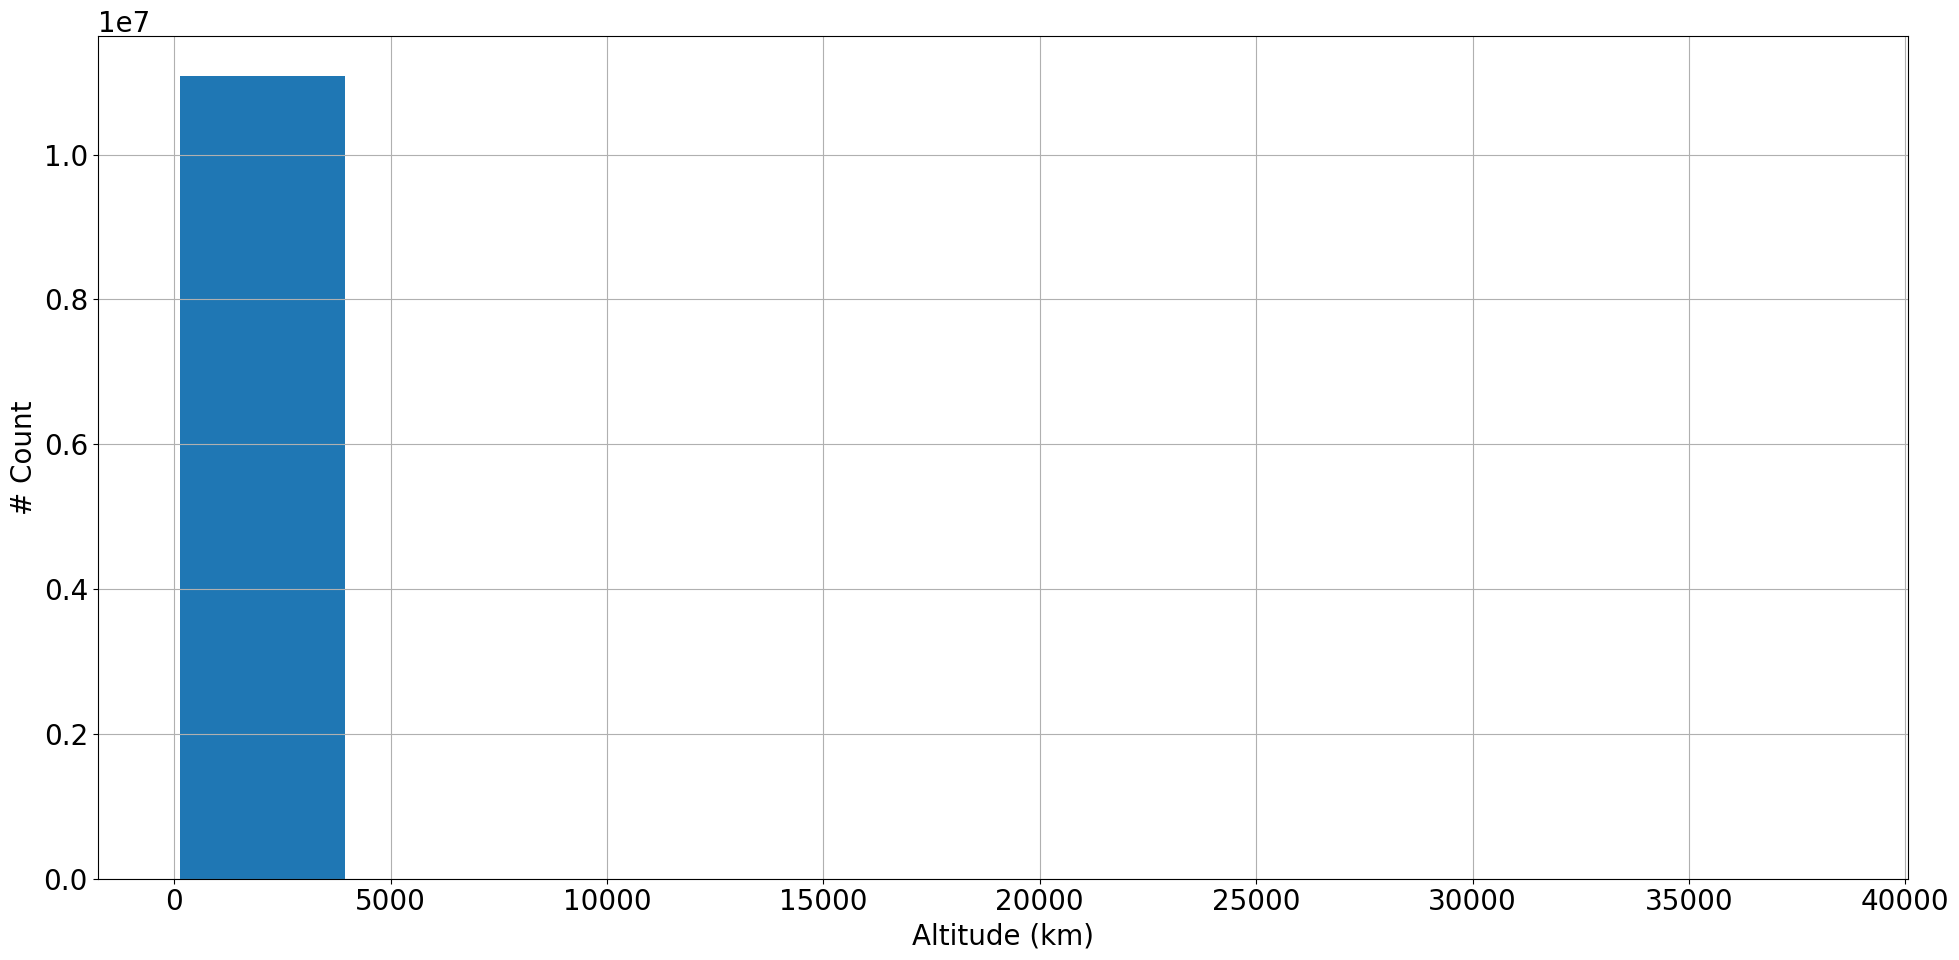

In [5]:
df_tles = get_merged_TLEs_from_all_CSVs(TLE_DIR_CSV)


# Save the CDF in CSV
x, y = cdf(df_tles[TLE.ALTITUDE_KM])

pd.DataFrame.from_dict(
    {"X": x, "Y": y}
).to_csv(f"{OUTPUT_DIR}/before_cleanup.csv")


# Plot histogram
plt.hist(df_tles[TLE.ALTITUDE_KM])
plt.xlabel("Altitude (km)")
plt.ylabel("# Count")
plt.grid()
plt.tight_layout()
plt.show()

### After cleaning

 Reading 96.8%  

/mnt/Storage/OUTPUTs/CosmicDance/cosmic_dance/TLEs.py:384: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[TLE.EPOCH] = pd.to_datetime(df[TLE.EPOCH])


 Reading 100.0%  


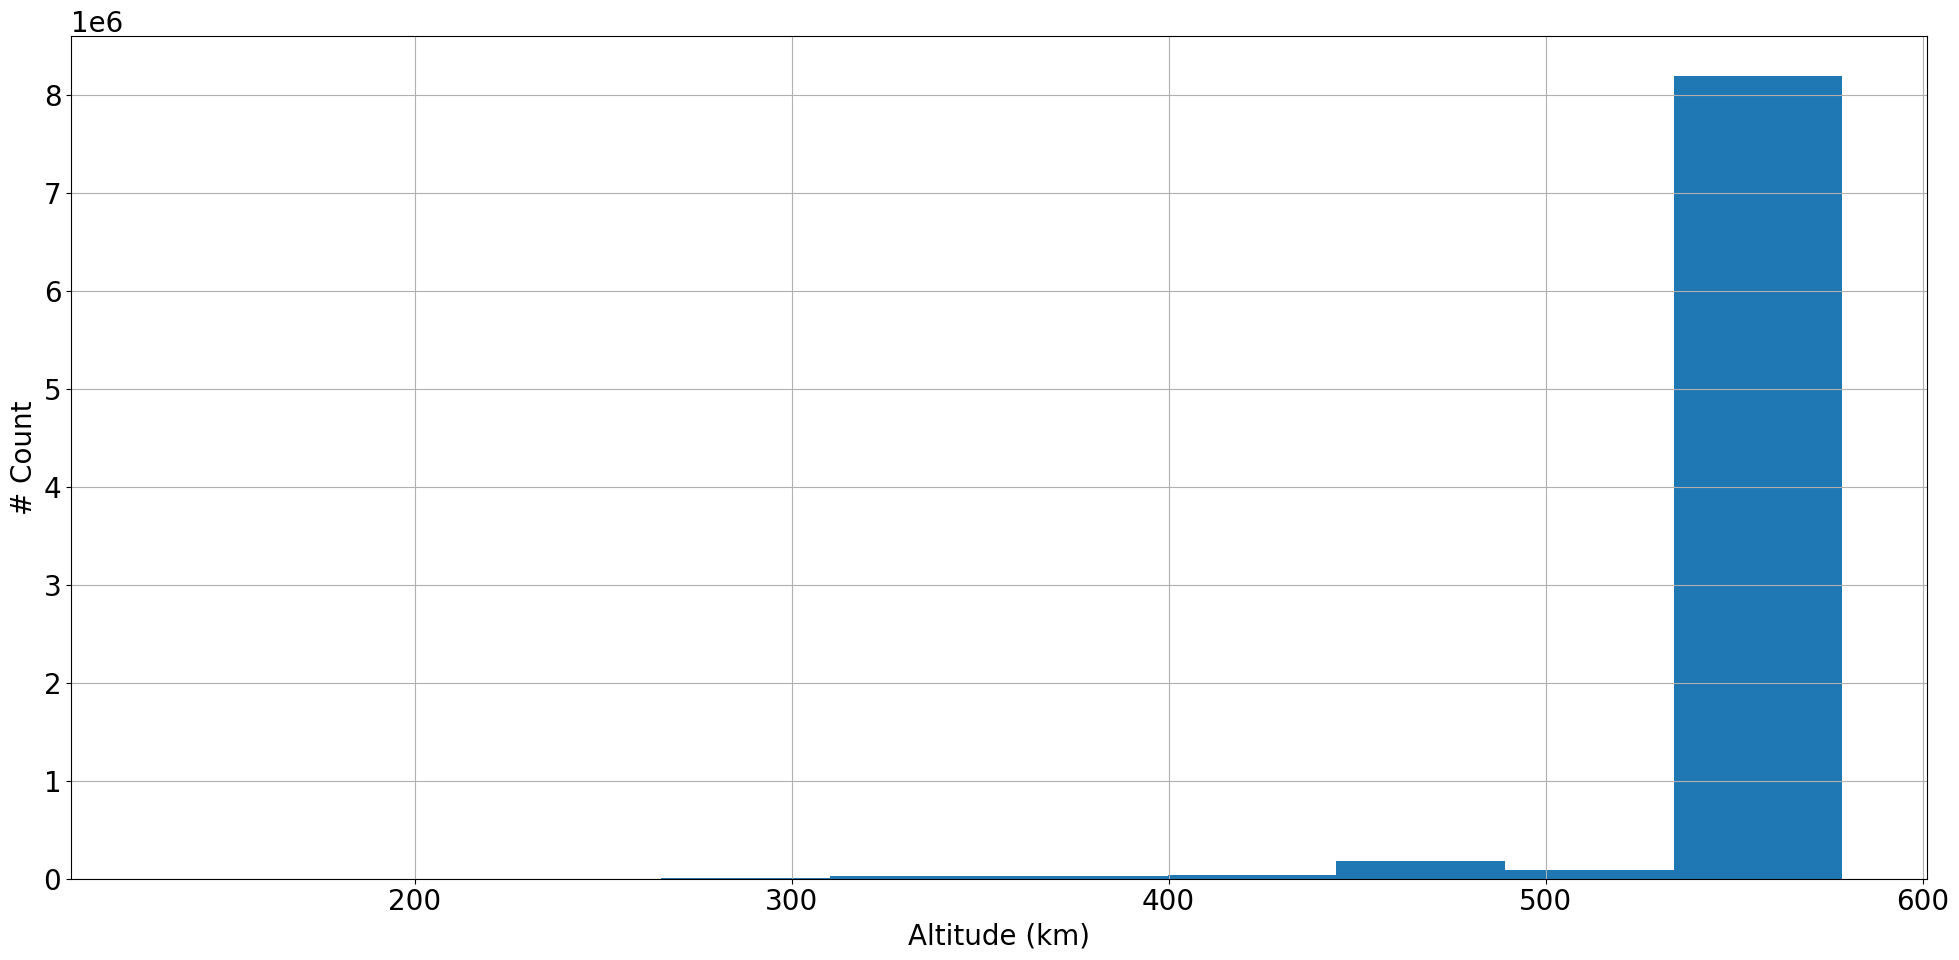

In [6]:
df_tles = get_merged_TLEs_from_all_CSVs(TLE_DIR_CSV)

# Save the CDF in CSV
x, y = cdf(df_tles[TLE.ALTITUDE_KM])
pd.DataFrame.from_dict(
    {"X": x, "Y": y}
).to_csv(f"{OUTPUT_DIR}/after_cleanup.csv")

# Plot histogram
plt.hist(df_tles[TLE.ALTITUDE_KM])
plt.xlabel("Altitude (km)")
plt.ylabel("# Count")
plt.grid()
plt.tight_layout()
plt.show()

### Compare the distributions

In [7]:
df_clean = read_CSV(f"{OUTPUT_DIR}/after_cleanup.csv")
df_raw = read_CSV(f"{OUTPUT_DIR}/before_cleanup.csv")

[]

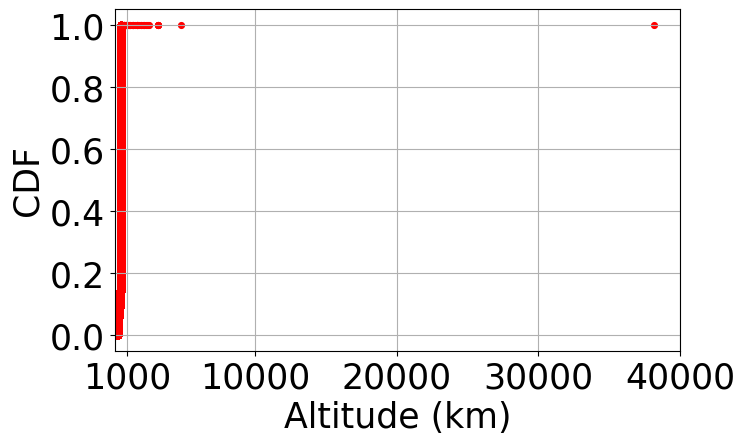

In [8]:
# Plotting
SIZE = 17

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 25})

# CDF before cleaning up
plt.scatter(df_raw["X"], df_raw["Y"], s=SIZE, c='r')

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xticks([1000, 10000, 20000, 30000, 40000])
plt.xlim(100, 40000)

plt.xlabel("Altitude (km)")
plt.ylabel("CDF")
plt.grid()
plt.tight_layout()
# plt.savefig("/home/suvam/Projects/CosmicDance/figures/pre_process/TLEs/before_cleanup.png")
plt.plot()

[]

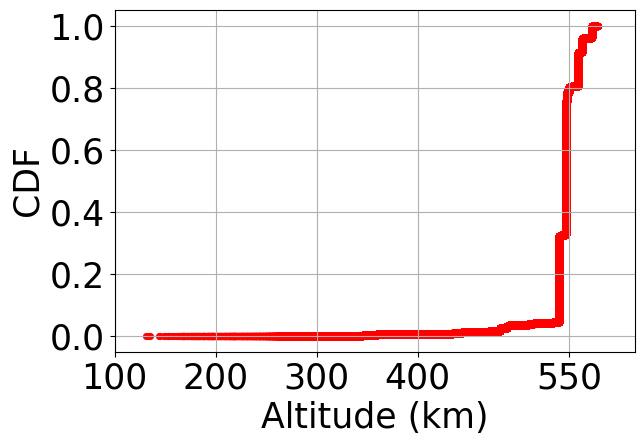

In [9]:
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams.update({'font.size': 25})

# CDF after cleaning up
plt.scatter(df_clean["X"], df_clean["Y"], s=SIZE, c='r')

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xticks([100, 200, 300, 400, 550])
plt.xlim(100, 615)

plt.xlabel("Altitude (km)")
plt.ylabel("CDF")

plt.grid()
plt.tight_layout()
# plt.savefig("/home/suvam/Projects/CosmicDance/figures/pre_process/TLEs/after_cleanup.png")
plt.plot()